In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from scipy.sparse.linalg import norm

In [2]:
import sys
sys.path.insert(0, "../scripts")

from SZFW_lasso import *
from DZFW_lasso import *
from IZFW_lasso import *

## Load data

In [3]:
# load data
X, y = datasets.load_svmlight_file("../Data/covtype.libsvm.binary.scale.bz2")

In [4]:
# space dimension
d = X.shape[1]
n = y.shape[0]
print(f"Space Dimensions\nd: {d}")
print(f"n: {y.shape[0]}")

Space Dimensions
d: 54
n: 581012


In [5]:
# define the objective function
F = lambda w: 0.5/n * np.sum(np.power(y - X @ w, 2))

In [14]:
# initialize prarameters for the algorithm (in common for all the algorithms)

# stating point, sparse
np.random.seed(1007)
w0 = np.random.rand(d)
w0 = w0/np.sum(w0) * np.random.rand(1)

indeces = np.random.randint(low = 0, high = d-1, size = 20)
w0[indeces] = int(0)
w0 = np.zeros(d)
print(f"w0: {w0}")

w0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Deterministic Gradient Free Frank Wolfe

In [7]:
%%time

# Lipschitz constant 
L = 3

fpred, f, w, mean, t, loss, f_values = detZFW(F, L, d, w0, T=100)

Loss evaluation at time 1:	0.7013836

Loss evaluation at time 2:	0.1212442

Loss evaluation at time 3:	0.0424383

Loss evaluation at time 4:	0.0199207

Loss evaluation at time 5:	0.0109946

Loss evaluation at time 6:	0.0067281

Loss evaluation at time 7:	0.0044241

Loss evaluation at time 8:	0.0030676

Loss evaluation at time 9:	0.0022159

Loss evaluation at time 10:	0.0016536

Loss evaluation at time 11:	0.0012671

Loss evaluation at time 12:	0.0009926

Loss evaluation at time 13:	0.0007922

Loss evaluation at time 14:	0.0006424

Loss evaluation at time 15:	0.0005282

Loss evaluation at time 16:	0.0004396

Loss evaluation at time 17:	0.0003698

Loss evaluation at time 18:	0.0003141

Loss evaluation at time 19:	0.0002690

Loss evaluation at time 20:	0.0002321

Loss evaluation at time 21:	0.0002017

Loss evaluation at time 22:	0.0001764

Loss evaluation at time 23:	0.0001552

Loss evaluation at time 24:	0.0001372

Loss evaluation at time 25:	0.0001219

Loss evaluation at time 26:	0.0001

In [8]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 1.2313988351359353

F(w_pred) = 0.3094685244480831

F(w) = 0.3094586488806545

w = [0.         0.         0.         0.         0.         0.
 0.         0.99945355 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

average w = [0.         0.         0.         0.         0.         0.
 0.         0.58032787 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.     

In [10]:
lossd = np.load("../Data/results/loss_dZFW_lasso.npy") # data from colab (NOT NORMALIZED)
f_d = np.load("../Data/results/function_dZFW_lasso.npy")
f_d = f_d/n
f_star = np.min(f_d)

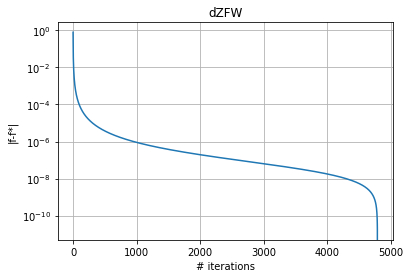

In [11]:
F_eval = np.abs(f_d - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("dZFW")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Stochastic Gradient Free Frank Wolfe

In [24]:
%%time
fpred, f, w, mean, t, loss, f_values = stochasticZFW(F, d, w0, method = "IRDSA", r=1, T=1000, eps=1e-5)

Loss evaluation at time 1:	0.1348504

Loss evaluation at time 2:	0.2071160

Loss evaluation at time 3:	0.0475324

Loss evaluation at time 4:	0.0417469

Loss evaluation at time 5:	0.0476304

Loss evaluation at time 6:	0.0359874

Loss evaluation at time 7:	0.0272840

Loss evaluation at time 8:	0.0925684

Loss evaluation at time 9:	0.0716703

Loss evaluation at time 10:	0.0565773

Loss evaluation at time 11:	0.0025581

Loss evaluation at time 12:	0.0001797

Loss evaluation at time 13:	0.0412584

Loss evaluation at time 14:	0.0342446

Loss evaluation at time 15:	0.0256308

Loss evaluation at time 16:	0.0216947

Loss evaluation at time 17:	0.0185261

Loss evaluation at time 18:	0.0159473

Loss evaluation at time 19:	0.0138277

Loss evaluation at time 20:	0.0120697

Loss evaluation at time 21:	0.0131704

Loss evaluation at time 22:	0.0116179

Loss evaluation at time 23:	0.0103019

Loss evaluation at time 24:	0.0091789

Loss evaluation at time 25:	0.0082147

Loss evaluation at time 26:	0.0073

In [25]:
print(f'OUTPUT:\n\nF(w0) = {f}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 0.31921023575540186

F(w_pred) = 0.31917582953522305

F(w) = 0.31921023575540186

w = [ 0.00000000e+00  9.06353935e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.92323182e-01  6.06906417e-01
  5.08346338e-04  0.00000000e+00  7.29023817e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.97033464e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.36440157e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

average w = [ 0. 

In [26]:
loss_stochm6 = np.load("../Data/results/loss_SZFWm6_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm6 = np.load("../Data/results/function_SZFWm6_lasso.npy")
f_stochm6 = f_stochm6/n

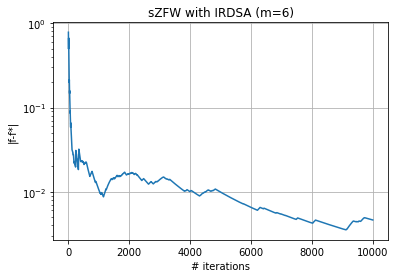

In [28]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with IRDSA (m=6)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

In [16]:
loss_stochm1 = np.load("../Data/results/loss_SZFWm1_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm1 = np.load("../Data/results/function_SZFWm1_lasso.npy")
f_stochm1 = f_stochm1/n

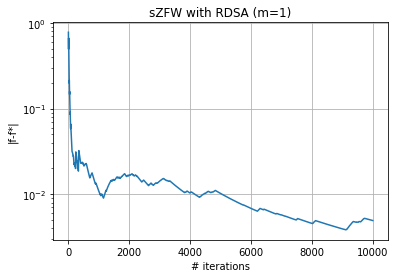

In [17]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with RDSA (m=1)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Zeroth order stochastic accelerated gradient method with Inexact updates

In [26]:
%%time 

# setting parameters
L = 0.1
D = 10000 # we will start from m = 6, up to T * (T+1) / D * (d+3) = 28785 (for T=100)
B = 1

fpred, f, w, mean, t, loss, f_values = IZFW(F, d, w0, L, B, r = 1, T = 10, eps = 1e-3)

Loss evaluation at time 1:	0.5551388

Loss evaluation at time 2:	0.1594307

Loss evaluation at time 3:	0.0591694

Loss evaluation at time 4:	0.0254504

Loss evaluation at time 5:	0.0151612

Loss evaluation at time 6:	0.0091598

Loss evaluation at time 7:	0.0059715

Loss evaluation at time 8:	0.0041158

Loss evaluation at time 9:	0.0029601

Loss evaluation at time 10:	0.0000698

CPU times: user 10min 14s, sys: 2min 3s, total: 12min 17s
Wall time: 6min 19s


In [27]:
print(f'OUTPUT:\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w_pred) = 0.32214128882503373

F(w) = 0.3222110957810947

w = [2.16289094e-04 0.00000000e+00 2.41000768e-06 0.00000000e+00
 2.10554422e-04 1.04369608e-04 1.26046176e-01 8.48701299e-01
 2.92755286e-04 2.24120232e-04 1.04074164e-02 6.79386592e-05
 1.13423366e-04 2.03377057e-04 1.92711195e-04 3.77499861e-04
 3.09299755e-04 4.15406449e-06 1.27576657e-04 1.38666268e-04
 3.23346108e-04 2.74576613e-04 0.00000000e+00 3.29258661e-05
 3.83774707e-04 0.00000000e+00 2.82850879e-04 0.00000000e+00
 0.00000000e+00 1.47909421e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.31257940e-05 1.23560966e-04
 0.00000000e+00 3.63943304e-05 2.09887263e-04 3.98000058e-05
 3.32670756e-04 3.86975316e-04 0.00000000e+00 0.00000000e+00
 8.47114209e-05 3.31887518e-04 2.82706175e-04 0.00000000e+00
 2.11208788e-04 0.00000000e+00 6.76320085e-05 9.27277323e-05
 1.68152971e-04 3.30287952e-04]

average w = [1.18959001e-03 0.00000000e+00 1.32550423e-05 0.00000000e+00
 1.15804932e-03 5.74032845e-

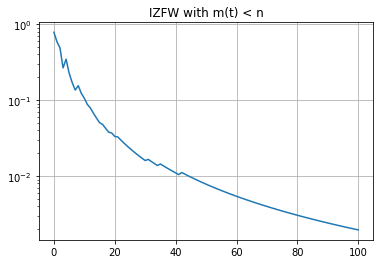

In [28]:
f_inex = np.load('../Data/results/function_IZFW_lasso.npy') # data from cluster
F_eval = np.abs(f_inex/n - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()

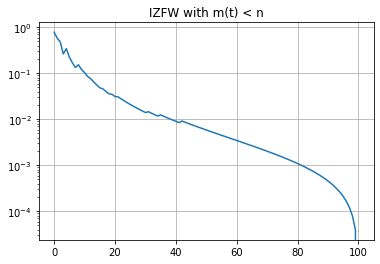

In [29]:
F_eval = np.abs(f_inex/n - np.min(f_inex/n))
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()